# House Prices

1. What is the business question? 
*       With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.
2. What each row represent? 
*       House
3. What is the evaluation method? 
*       Submissions are evaluated on Root-Mean-Squared-Error (RMSE) 


# 1. Important imports

In [55]:
# load data libraries
import numpy as np # linear algebra library
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split

# data understanding libraries
import seaborn as sns
import matplotlib.pyplot as plt # ploting library
%matplotlib inline

# data prp
from sklearn.preprocessing import RobustScaler


# Modeling
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

# Evaluation
from sklearn.metrics import mean_squared_error


In [56]:
pd.set_option('display.max_rows', 10000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.precision',150)
pd.options.display.float_format = '{:,.3f}'.format

# 2. Load Data

In [57]:
#read training json file 
train = pd.read_csv("home-data-for-ml-course/train.csv")
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [58]:
columns_selected = ['LotArea','YearBuilt','1stFlrSF','2ndFlrSF','FullBath',
                        'BedroomAbvGr','TotRmsAbvGrd','SalePrice']
data = train[columns_selected]
data.head()

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd,SalePrice
0,8450,2003,856,854,2,3,8,208500
1,9600,1976,1262,0,2,3,6,181500
2,11250,2001,920,866,2,3,6,223500
3,9550,1915,961,756,1,3,7,140000
4,14260,2000,1145,1053,2,4,9,250000


In [59]:
train_data, test_data = train_test_split(data, test_size=0.3, random_state=1)
print("Train set size is ",len(train_data))
print("Test set size is ",len(test_data))

Train set size is  1022
Test set size is  438


# 2. Data Understanding

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1022 entries, 632 to 1061
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   LotArea       1022 non-null   int64
 1   YearBuilt     1022 non-null   int64
 2   1stFlrSF      1022 non-null   int64
 3   2ndFlrSF      1022 non-null   int64
 4   FullBath      1022 non-null   int64
 5   BedroomAbvGr  1022 non-null   int64
 6   TotRmsAbvGrd  1022 non-null   int64
 7   SalePrice     1022 non-null   int64
dtypes: int64(8)
memory usage: 71.9 KB


In [8]:
# print a summary of the data in Melbourne data
train_data.describe()

,LotArea,YearBuilt,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd,SalePrice
count,"1,022.000","1,022.000","1,022.000","1,022.000","1,022.000","1,022.000","1,022.000","1,022.000"
mean,"10,657.749","1,971.476","1,170.950",344.212,1.564,2.890,6.542,"181,438.534"
std,"10,441.234",30.063,392.337,435.065,0.538,0.807,1.628,"77,165.422"
min,"1,300.000","1,872.000",334.000,0.000,0.000,0.000,2.000,"39,300.000"
25%,"7,558.500","1,954.000",888.000,0.000,1.000,2.000,5.000,"130,500.000"
50%,"9,528.000","1,973.000","1,095.000",0.000,2.000,3.000,6.000,"163,250.000"
75%,"11,643.500","2,001.000","1,413.500",739.000,2.000,3.000,7.000,"214,800.000"
max,"215,245.000","2,010.000","4,692.000","1,872.000",3.000,8.000,14.000,"755,000.000"


C:\Users\eltahera\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


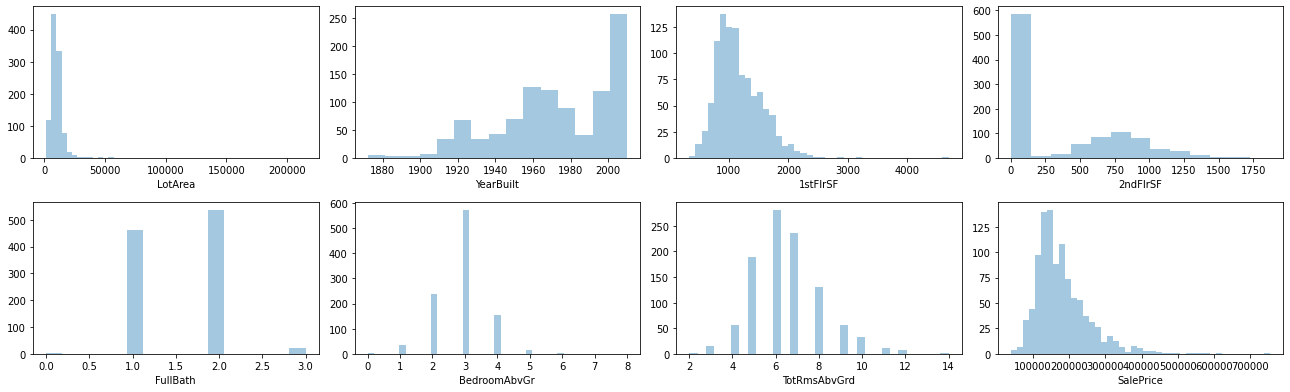

In [12]:
# distribution
fig = plt.figure(figsize=(18,16))
for index,col in enumerate(columns_selected):
    plt.subplot(6,4,index+1)
    sns.distplot(train_data.loc[:,col].dropna(), kde=False)
fig.tight_layout(pad=1.0)

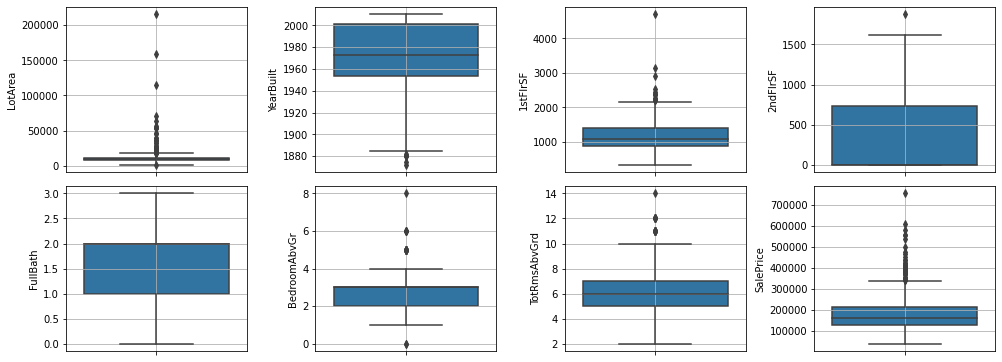

In [27]:
# check outliers 
fig = plt.figure(figsize=(14,15))
for index,col in enumerate(columns_selected):
    plt.subplot(6,4,index+1)
    sns.boxplot(y=col, data=train_data.dropna())
    plt.grid()
fig.tight_layout(pad=1.0)

In [1]:
# corr
plt.figure(figsize=(14,8))
correlation = train_data.corr()
sns.heatmap(correlation, mask = correlation <0.8, linewidth=0.5, cmap='Blues')
plt.grid()

NameError: name 'plt' is not defined

In [15]:
# corr to label
numeric_train = train_data.select_dtypes(exclude=['object'])
correlation = numeric_train.corr()
correlation[['SalePrice']].sort_values(['SalePrice'], ascending=False)

,SalePrice
SalePrice,1.000
1stFlrSF,0.588
FullBath,0.577
TotRmsAbvGrd,0.535
YearBuilt,0.500
2ndFlrSF,0.308
LotArea,0.274
BedroomAbvGr,0.182


C:\Users\eltahera\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


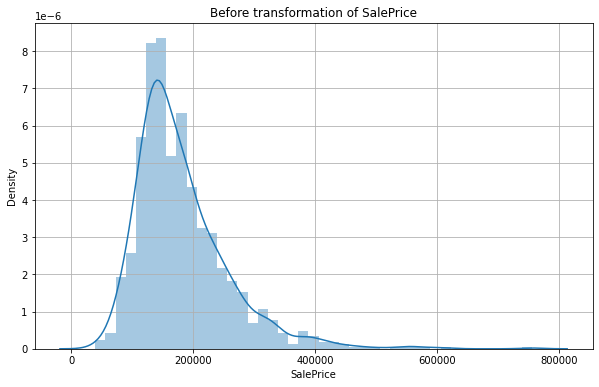

In [25]:
# dist of label
plt.figure(figsize=(10,6))
plt.title("Before transformation of SalePrice")
dist = sns.distplot(train_data['SalePrice'],norm_hist=False)
plt.grid()

# 3. Data Prep

In [62]:
def prep_df(train, test, cols):
    # remove outliers
    train = train.drop(train[train['LotArea'] > 100000].index)

    # scale features    
    transformer = RobustScaler().fit(train[cols])
    train[cols] = transformer.transform(train[cols])
    test[cols] = transformer.transform(test[cols])
    return train, test

In [63]:
prep_columns = ['LotArea','1stFlrSF','2ndFlrSF','FullBath', 'BedroomAbvGr','TotRmsAbvGrd']
train_preped, test_preped =  prep_df(train_data, test_data, prep_columns)

# Modeling 
## 1) Simple Linear Regression

In [64]:
# Features
X = ['YearBuilt']
# Target
y = 'SalePrice'

# select columns
train_X = train_preped[X]
train_y = train_preped[y]
test_X = test_preped[X]
test_y = test_preped[y]

In [65]:
# Creating the model
model = LinearRegression()

# Fitting the model
model.fit(train_X, train_y)

# Predictions
predictions = model.predict(test_X)

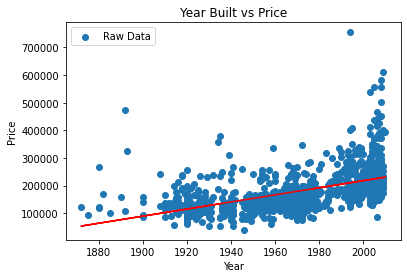

In [66]:
plt.scatter(train_X, train_y, label='Raw Data')
plt.plot(train_X,model.coef_*train_X +model.intercept_, color='red')
plt.title('Year Built vs Price')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()

## 2) Multi Linear Regression

In [68]:
# Features
X = ['LotArea','YearBuilt','1stFlrSF','2ndFlrSF','FullBath', 'BedroomAbvGr','TotRmsAbvGrd']
# Target
y = 'SalePrice'

# select columns
train_X = train_preped[X]
train_y = train_preped[y]
test_X = test_preped[X]
test_y = test_preped[y]

In [69]:
# Creating the model
model = LinearRegression()

# Fitting the model
model.fit(train_X, train_y)

# Predictions
predictions = model.predict(test_X)